<a href="https://colab.research.google.com/github/aryaanadam55/Main-Project-Cardiac-Arrhythmia/blob/main/Cleaned_Arrhythmia_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">Classification of Arrhythmia</h1>

The Dataset used in this project is available on the UCI machine learning Repository.

* It can be found at: https://archive.ics.uci.edu/ml/datasets/Arrhythmia.


* It consists of 452 different examples spread over 16 classes. Of the 452 examples,

    - 245 are of "normal" people. We also have 12 different types of arrhythmias.
    
    - Among all these types of arrhythmias, the most representative are the "coronary artery disease" and "Rjgbt boundle branch block".


* We have 279 features, which include age, sex, weight, height of patients and other related information. We explicitly observe that the number of features is relatively high compared to the number of examples we are available.


* Our goal is to predict if a person is suffering from arrhythmia or not, and if **yes**, classify it in to one of 12 available groups.

### Importing Essential Libraries

In [ ]:

import warnings
warnings.filterwarnings("ignore")

!pip install --upgrade --no-cache-dir --force-reinstall \
    scikit-plot seaborn scikit-learn matplotlib joblib threadpoolctl \
    "numpy<2.1.0,>=1.26.0" "pandas==2.2.2" "scipy>=1.10,<1.15" \
    --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 160.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 145.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 232.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 119.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 176.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 97.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 112.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 141.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 215.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import math as mt
import seaborn as sns

import matplotlib.pyplot as plt
#to avoid writing plot.show
%matplotlib inline
from sklearn.impute import SimpleImputer

In [ ]:
from scipy.interpolate import interp1d


### Data Reading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project/DATASET/arrhythmia.csv')

In [ ]:
df.head()

,75,0,190,80,91,193,371,174,121,-16,...,0.0.38,9.0,-0.9,0.0.39,0.0.40,0.9.2,2.9.1,23.3,49.4,8
0,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
1,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
2,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
3,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
4,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14


In [ ]:

df.tail()

,75,0,190,80,91,193,371,174,121,-16,...,0.0.38,9.0,-0.9,0.0.39,0.0.40,0.9.2,2.9.1,23.3,49.4,8
446,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
447,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
448,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
449,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
450,78,1,160,70,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1


**Basic Description of dataframe**

In [ ]:
#Dimension of dataset.

df.shape

(451, 280)

In [ ]:
#concise summary of the dataframe.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Columns: 280 entries, 75 to 8
dtypes: float64(120), int64(155), object(5)
memory usage: 986.7+ KB


In [ ]:
#descriptive statistics of dataframe.

df.describe()

,75,0,190,80,91,193,371,174,121,-16,...,0.0.38,9.0,-0.9,0.0.39,0.0.40,0.9.2,2.9.1,23.3,49.4,8
count,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,...,451.000000,451.000000,451.000000,451.000000,451.0,451.000000,451.000000,451.000000,451.000000,451.000000
mean,46.407982,0.552106,166.135255,68.144124,88.915743,155.068736,367.199557,169.940133,89.935698,33.787140,...,-0.279601,9.048115,-1.458537,0.003991,0.0,0.513969,1.218625,19.317295,29.429047,3.871397
std,16.429846,0.497830,37.194646,16.599841,15.381143,44.856534,33.422017,35.672130,25.813912,45.421423,...,0.549328,3.476718,2.004481,0.050173,0.0,0.347441,1.425438,13.517617,18.490566,4.407706
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,4.000000,...,-0.450000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.400000,17.500000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.300000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,78.500000,94.000000,174.500000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.850000,41.050000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


# 1. Data preprocessing






















### Handling Missing Values

<br>
When we went through the dataset we observed that out of 279 attributes, 5 Attributes have missing value in the form
of '?'. Our approach is

- first replacing '?' with numpy.NAN.
- Imputing the mean using Simple Imputer.

**Checking for null values in dataset**

In [ ]:
#Counting total Number of null values

pd.isnull(df).sum().sum()

np.int64(0)

In [ ]:
#Replacing ? with np.nan value-

df = df.replace('?', np.nan)

In [ ]:
#final counting total number of null values in dataset

nv=pd.isnull(df).sum().sum()
nv

np.int64(407)

**Visualizing  the distribution of our missing data:**

Text(0, 0.5, 'Total number of null value in each column')

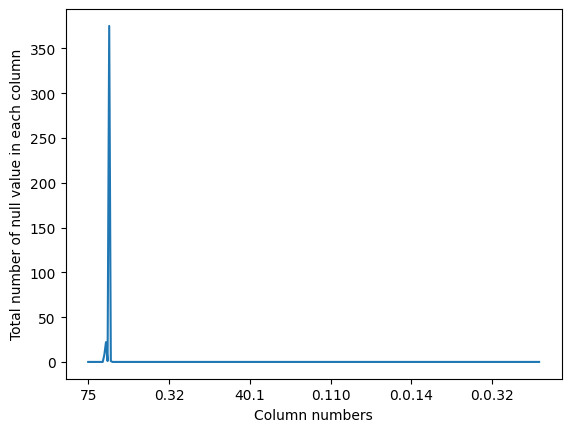

In [ ]:
pd.isnull(df).sum().plot()
plt.xlabel('Column numbers')
plt.ylabel('Total number of null value in each column')

Text(0, 0.5, 'Total number of null value in each column')

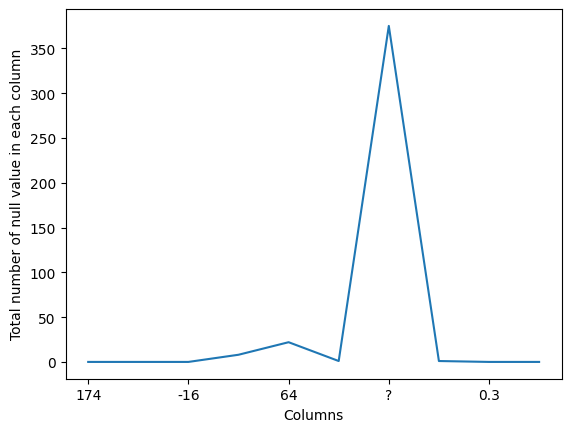

In [ ]:
#Zooming in

pd.isnull(df).sum()[7:17].plot(kind="line")
plt.xlabel('Columns')
plt.ylabel('Total number of null value in each column')

Column 13 contains more than 350 missing values out of total 452 instances. so we will drop column 13. other attributes have comparatively less null values. So instead of droping, we will replace the null value of other attributes with their mean values.

In [ ]:
#Dropping the column 13

df.drop(df.columns[13], axis=1, inplace=True) # Drop the column at index 13 by specifying the column name from df.columns and using axis=1 (for columns)

**Using the mean strategy for imputation**

In [ ]:
# prompt: print coulnm names in df

df.columns


Index(['75', '0', '190', '80', '91', '193', '371', '174', '121', '-16',
       ...
       '0.0.38', '9.0', '-0.9', '0.0.39', '0.0.40', '0.9.2', '2.9.1', '23.3',
       '49.4', '8'],
      dtype='object', length=279)

In [ ]:
# make copy to avoid changing original data (when Imputing)

new_df = df.copy()

In [ ]:
# make new columns indicating what will be imputed

cols_with_missing = (col for col in new_df.columns if new_df[col].isnull().any())
for col in cols_with_missing:
    new_df[col] = new_df[col].isnull()

In [ ]:
# Imputation
# my_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

my_imputer = SimpleImputer()
new_df = pd.DataFrame(my_imputer.fit_transform(new_df))
new_df.columns = df.columns

In [ ]:

# imputed dataframe

new_df.head()

,75,0,190,80,91,193,371,174,121,-16,...,0.0.38,9.0,-0.9,0.0.39,0.0.40,0.9.2,2.9.1,23.3,49.4,8
0,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
1,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
2,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
3,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0
4,13.0,0.0,169.0,51.0,100.0,167.0,321.0,174.0,91.0,107.0,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14.0


In [ ]:

# DataSet with Zero null Values.

pd.isnull(new_df).sum().sum()

np.int64(0)

**Generating final dataset**

In [ ]:


#Creating column names

final_df_columns=["Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom",
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279","class"]

In [ ]:
final_df_columns

['Age',
 'Sex',
 'Height',
 'Weight',
 'QRS_Dur',
 'P-R_Int',
 'Q-T_Int',
 'T_Int',
 'P_Int',
 'QRS',
 'T',
 'P',
 'J',
 'Heart_Rate',
 'Q_Wave',
 'R_Wave',
 'S_Wave',
 "R'_Wave",
 "S'_Wave",
 'Int_Def',
 'Rag_R_Nom',
 'Diph_R_Nom',
 'Rag_P_Nom',
 'Diph_P_Nom',
 'Rag_T_Nom',
 'Diph_T_Nom',
 'DII00',
 'DII01',
 'DII02',
 'DII03',
 'DII04',
 'DII05',
 'DII06',
 'DII07',
 'DII08',
 'DII09',
 'DII10',
 'DII11',
 'DIII00',
 'DIII01',
 'DIII02',
 'DIII03',
 'DIII04',
 'DIII05',
 'DIII06',
 'DIII07',
 'DIII08',
 'DIII09',
 'DIII10',
 'DIII11',
 'AVR00',
 'AVR01',
 'AVR02',
 'AVR03',
 'AVR04',
 'AVR05',
 'AVR06',
 'AVR07',
 'AVR08',
 'AVR09',
 'AVR10',
 'AVR11',
 'AVL00',
 'AVL01',
 'AVL02',
 'AVL03',
 'AVL04',
 'AVL05',
 'AVL06',
 'AVL07',
 'AVL08',
 'AVL09',
 'AVL10',
 'AVL11',
 'AVF00',
 'AVF01',
 'AVF02',
 'AVF03',
 'AVF04',
 'AVF05',
 'AVF06',
 'AVF07',
 'AVF08',
 'AVF09',
 'AVF10',
 'AVF11',
 'V100',
 'V101',
 'V102',
 'V103',
 'V104',
 'V105',
 'V106',
 'V107',
 'V108',
 'V109',
 'V110'

In [ ]:
new_df.columns=final_df_columns

As our dataframe is completely cleaned and preprocessed. we will remove the target attribute and store our final dataframe.

In [ ]:
new_df.describe()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
count,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,...,451.000000,451.000000,451.000000,451.000000,451.0,451.000000,451.000000,451.000000,451.000000,451.000000
mean,46.407982,0.552106,166.135255,68.144124,88.915743,155.068736,367.199557,169.940133,89.935698,33.787140,...,-0.279601,9.048115,-1.458537,0.003991,0.0,0.513969,1.218625,19.317295,29.429047,3.871397
std,16.429846,0.497830,37.194646,16.599841,15.381143,44.856534,33.422017,35.672130,25.813912,45.421423,...,0.549328,3.476718,2.004481,0.050173,0.0,0.347441,1.425438,13.517617,18.490566,4.407706
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,4.000000,...,-0.450000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.400000,17.500000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.300000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,78.500000,94.000000,174.500000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.850000,41.050000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [ ]:

target=new_df["class"]

final_df = new_df.drop(columns ="class")

In [ ]:
final_df.shape

(451, 278)

# 2. Exploratory Data Analysis (EDA)

Analyzing data sets to summarize their main characteristics.

Making List of all the type of Arrythmia corresponsing to their class label

In [ ]:
#List with class names

class_names = ["Normal",
               "Ischemic changes (CAD)",
               "Old Anterior Myocardial Infraction",
               "Old Inferior Myocardial Infraction",
               "Sinus tachycardy",
               "Sinus bradycardy",
               "Ventricular Premature Contraction (PVC)",
               "Supraventricular Premature Contraction",
               "Left Boundle branch block",
               "Right boundle branch block",
               "1.Degree AtrioVentricular block",
               "2.Degree AV block",
               "3.Degree AV block",
               "Left Ventricule hypertrophy",
               "Atrial Fibrillation or Flutter",
               "Others"]

### Analyzing the dataset and check how many examples we have for each class:
we need to sort our dataset with respect to class attributes to count the number of instances available for each class

In [ ]:
t=new_df.sort_values(by=["class"])

In [ ]:
# Counting the number of instances for each class

la = t["class"].value_counts(sort=False).tolist()
la

[245, 44, 15, 15, 13, 25, 3, 1, 9, 50, 4, 5, 22]

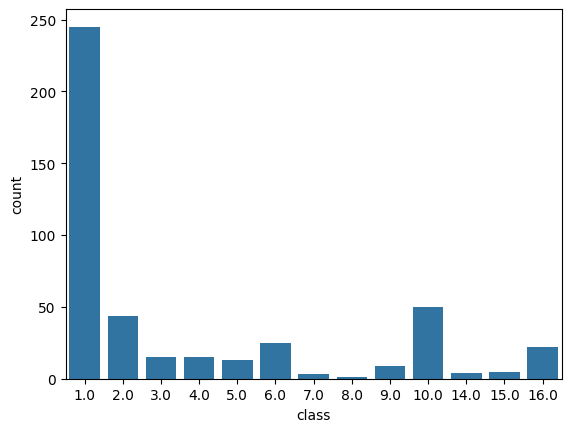

In [ ]:
sns.countplot(x ='class',data =new_df)
plt.show()

Lets Count the total number of instances we have for each class.

In [ ]:

values = la[0:10]
values.extend([0,0,0])
values.extend(la[10:13])
print(values)


[245, 44, 15, 15, 13, 25, 3, 1, 9, 50, 0, 0, 0, 4, 5, 22]


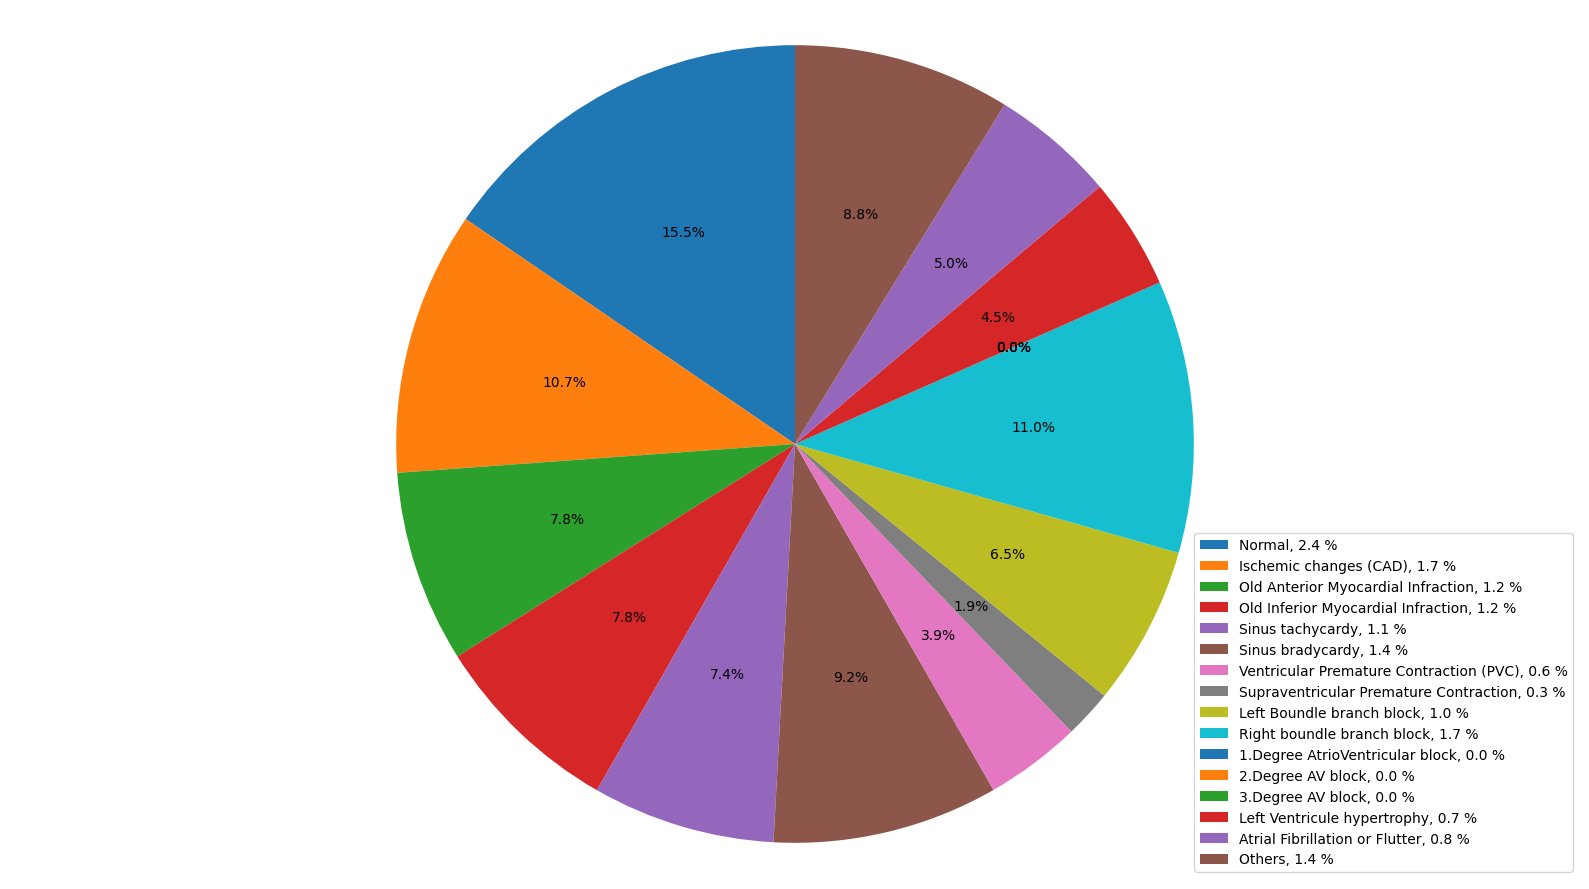

In [ ]:
labels = class_names
Log_Norm = []
for i in values:
    Log_Norm.append(mt.log10(i+1))
fig1, ax1 = plt.subplots(figsize=(16,9))
patches = plt.pie(Log_Norm, autopct='%1.1f%%', startangle=90)

leg = plt.legend( loc = 'best', labels=['%s, %1.1f %%' % (l, s) for l, s in zip(labels, Log_Norm)])
plt.axis('equal')

for text in leg.get_texts():
    plt.setp(text, color = 'Black')
plt.tight_layout()
plt.show()


We found that Of the 452 examples, 245 are of class A which refers to "normal" people. We also have 12 different types of arrhythmias and 3 other type of arrthmias are not present in our dataset.


### Handling Outliers & Data Visualization





Outliers are data points that significantly differ from the rest of the dataset. They can be unusually high or low values that don’t follow the general trend of the data. Outliers can occur due to measurement errors, natural variation, or rare events.

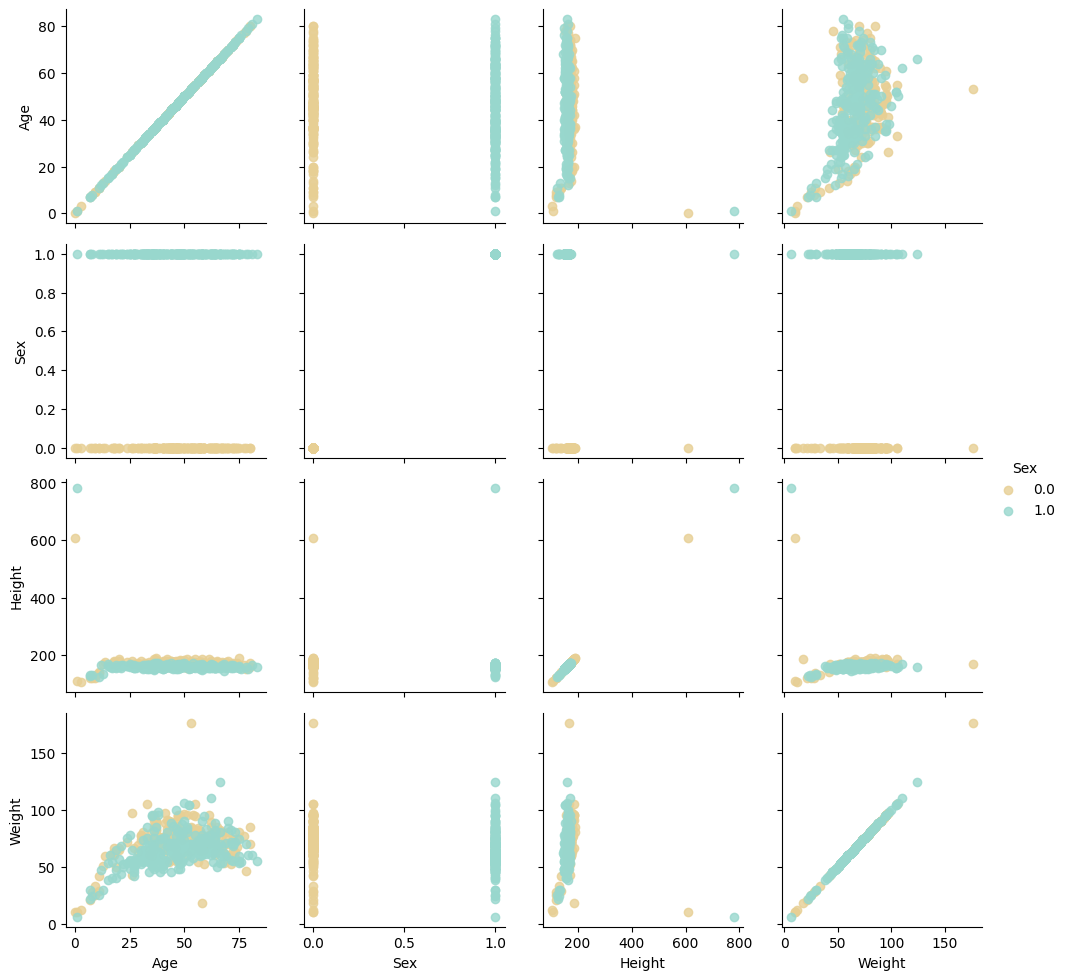

In [ ]:

#looking for pairwise relationships and outliers

g = sns.PairGrid(final_df, vars=['Age', 'Sex', 'Height', 'Weight'],hue='Sex', palette='BrBG')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

According to scatter plots, there are few outliers in 'height' and 'weight' attributes.check the maximums of heights and weights

In [ ]:
sorted(final_df['Height'], reverse=True)[:10]

[780.0, 608.0, 190.0, 190.0, 188.0, 186.0, 186.0, 186.0, 185.0, 185.0]

The tallest person ever lived in the world was **272** cm (1940). His followers were **267** cm(1905) and **263.5** cm(1969). Replacing **780** and **608** with **180** and **108** cm respectively

In [ ]:
final_df['Height']=final_df['Height'].replace(608,108)
final_df['Height']=final_df['Height'].replace(780,180)

In [ ]:

sorted(final_df['Weight'], reverse=True)[:10]

[176.0, 124.0, 110.0, 106.0, 105.0, 105.0, 104.0, 104.0, 100.0, 98.0]

**176 kgs** is a possible weight. so we'll keep them in the dataframe.

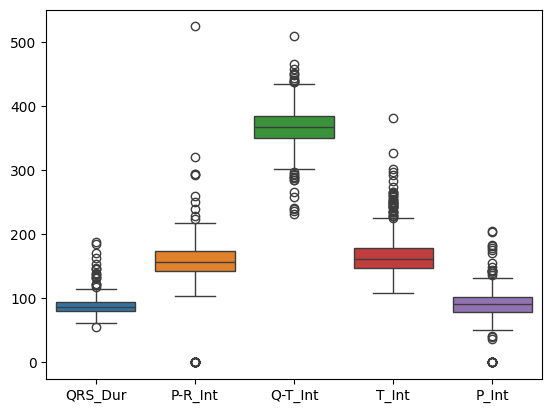

In [ ]:
sns.boxplot(data=final_df[["QRS_Dur","P-R_Int","Q-T_Int","T_Int","P_Int"]]);

PR interval is the period, measured in milliseconds, that extends from the beginning of the P wave until the beginning of the QRS complex; it is normally between 120 and 200ms in duration.

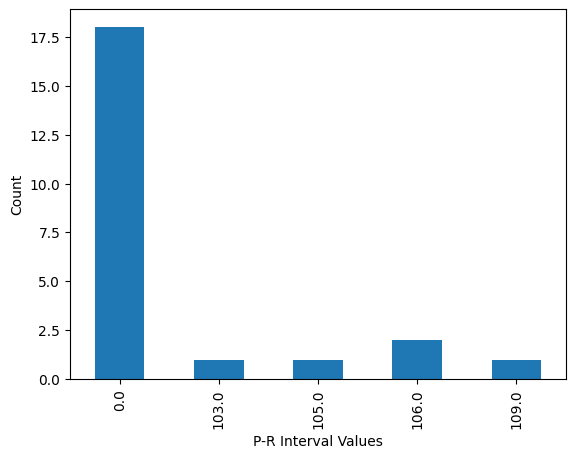

In [ ]:
final_df['P-R_Int'].value_counts().sort_index().head().plot(kind='bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Count');

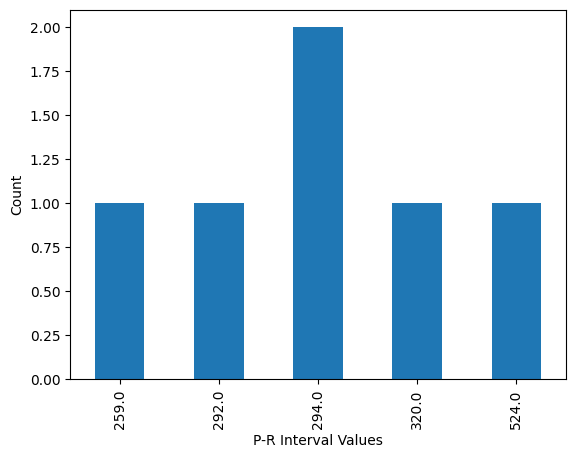

In [ ]:
final_df['P-R_Int'].value_counts().sort_index().tail().plot(kind='bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Count');

PR Interval data is including outliers 0(x18). we'll keep them

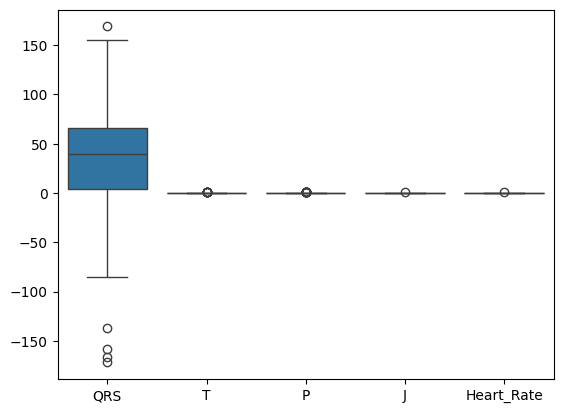

In [ ]:
sns.boxplot(data=final_df[["QRS","T","P","J","Heart_Rate"]]);

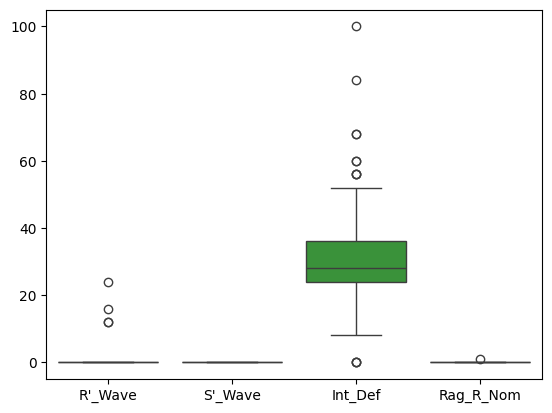

In [ ]:
sns.boxplot(data=final_df[["R'_Wave","S'_Wave","Int_Def","Rag_R_Nom"]]);

*S*'Wave has 0's which is not a NaN. So, we can't assume it as including outliers.

In [ ]:
final_df["S'_Wave"].value_counts().sort_index(ascending=False)

,count
S'_Wave,
0.0,451


In [ ]:
final_df["V101"].value_counts().sort_index(ascending=False)

,count
V101,
216.0,1
112.0,1
84.0,1
72.0,1
68.0,1
64.0,1
48.0,6
44.0,6
40.0,13


**V101** has an outlier, but when we look at other sets (V201, V301, V501) we can see that there's an outlier similarly. Since our data is heavily biased, I can't say these outliers should be dropped.

For example, when we look at our data, we can see that class # 8 (Supraventricular Premature Contraction) **has only 2 instances**. Or # 3 (Ventricular Premature Contraction (PVC)) has only 3. The outliers appearing with our plots might belong to these instances and needs to be kept.

In [ ]:
final_df["V201"].value_counts().sort_index(ascending=False)

,count
V201,
216.0,1
136.0,1
84.0,1
72.0,1
60.0,5
56.0,4
52.0,12
48.0,19
44.0,53


In [ ]:
final_df["V301"].value_counts().sort_index(ascending=False)

,count
V301,
132.0,1
88.0,2
76.0,2
72.0,1
68.0,2
64.0,3
60.0,16
56.0,26
52.0,57


In [ ]:
final_df["V501"].value_counts().sort_index(ascending=False)

,count
V501,
136.0,1
120.0,2
116.0,1
108.0,1
96.0,1
92.0,1
84.0,1
76.0,2
72.0,3


Now we can see outlier within the last two attributes of each series(DIII188, DIII189, AVR198, AVR199, AVL208, AVL209, AVF218, AVF219, V2238, V2239, V3248, V3249,V4258, V4259,V5268, V5269, V6278, V6279). Similiarly assuming that these outliers might belong to the classes with few instances.

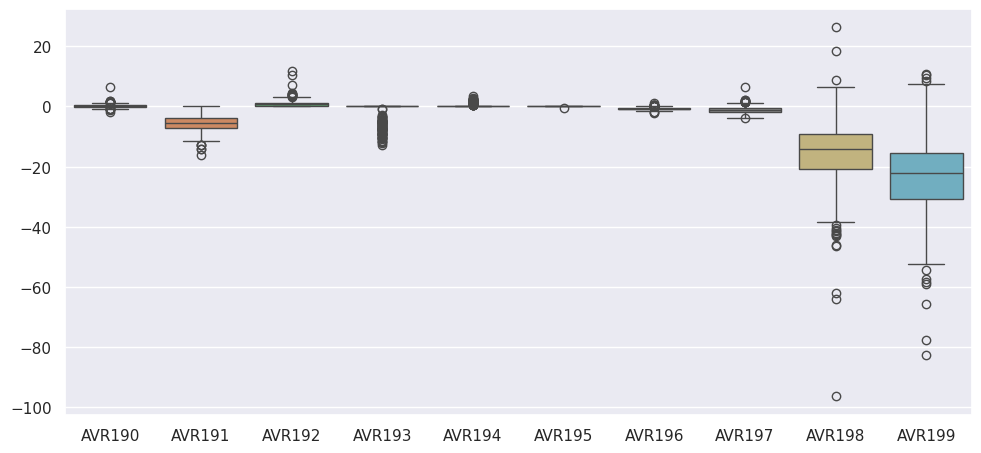

In [ ]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199"]]);

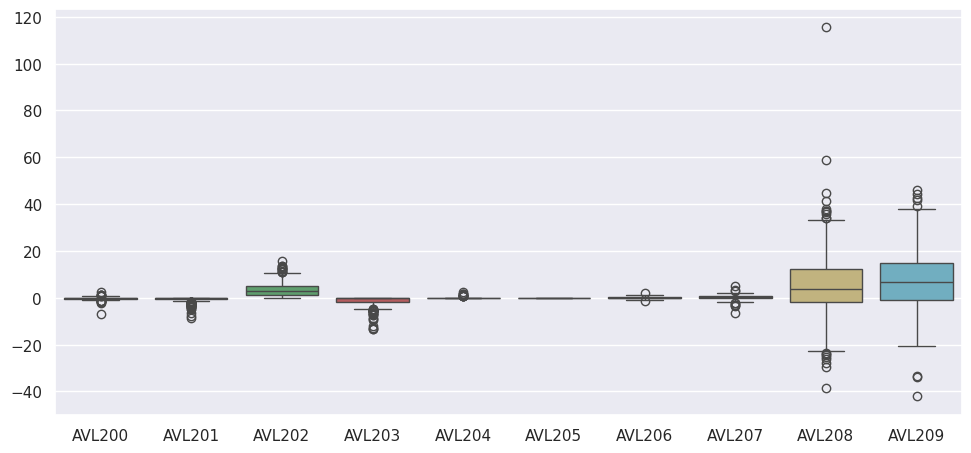

In [ ]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209"]]);

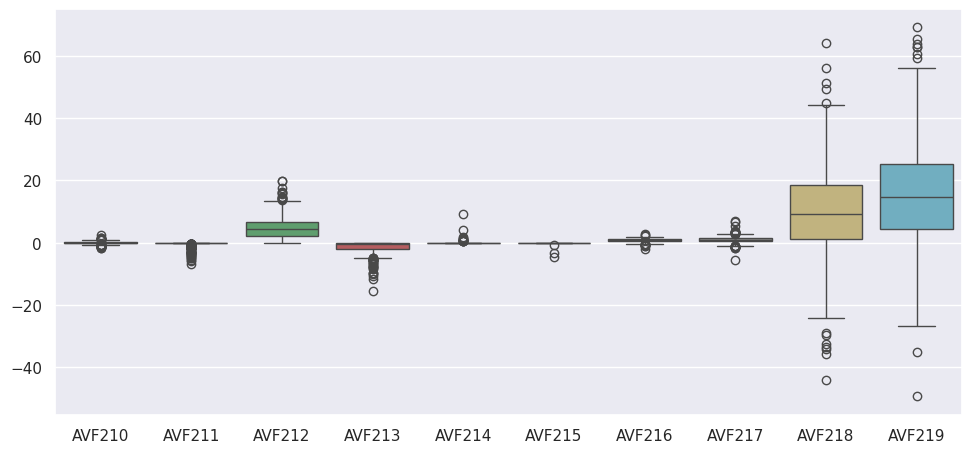

In [ ]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219"]]);

In [ ]:
#finding correlation with target feature using pearson correlation

target=new_df["class"]
pearsoncorr = final_df.corrwith(other = target,method='pearson')
pearsoncorr.values

array([-9.63953176e-02, -1.76192726e-01, -4.00467159e-02, -9.17727611e-02,
        3.23918775e-01, -1.01886734e-01,  2.80967349e-02,  9.74853414e-02,
       -1.24816358e-01,  2.19071159e-02,  1.09973839e-04,  1.91310194e-01,
       -3.07437189e-02,  3.34975965e-02,  5.06916325e-03,  4.26729753e-02,
        1.93323243e-01,  6.42496273e-02,             nan,  4.24003165e-02,
       -2.00368330e-02,  7.90239377e-03, -3.53848077e-02,  3.22668039e-02,
        3.22668039e-02,  8.33337655e-02, -2.57462471e-03,  4.96802756e-02,
        1.83319405e-01, -4.09620130e-02,  6.67239854e-02,  6.86287753e-02,
        4.20776827e-02,  8.02811682e-02, -2.00368330e-02,  1.71081283e-02,
       -3.59472363e-02, -4.06504070e-04, -2.71876432e-02,  1.16808189e-01,
        8.34787880e-02,  1.49651215e-02, -3.18332296e-02,  8.03801729e-02,
       -3.07437189e-02,  5.18840837e-02, -3.07437189e-02, -8.38254438e-02,
       -1.13363624e-02, -5.62988506e-03,  2.05040713e-02,  1.75964215e-01,
        3.43370158e-03,  

## Feature Scaling and Splitting dataset
<br />
We will be using 80% of our dataset for training purpose and 20% for testing purpose.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df, target ,test_size=0.2, random_state=1)

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Evaluation strategy


As the dependent variable is a categorical variable we will be using classification models. The best evaluation strategy for classification models is comparing the precision and recall. Thinking about the classification evaluation metrics, the importance of our models' precitions (we can't accept a result having the probability of saying to a healthy person that you have Cardiac Arrhythmia (FN)).

We definitely will focus on Sensitivity (the percentage of sick people who are correctly identified as having the condition) not Specificity (percentage of healthy people who are correctly identified as not having the condition).

In [ ]:
# importing evaluation metrices.

from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,recall_score,precision_score,confusion_matrix,classification_report
#from scikitplot.metrics import plot_confusion_matrix,plot_roc

# **3. Modeling**

In [ ]:
# will store result of each model.

result = pd.DataFrame(columns=['Model','Train Accuracy','Test Accuracy'])

## KNN Classifier

In [ ]:
!pip install --upgrade --no-cache-dir --force-reinstall \
    scikit-plot seaborn scikit-learn matplotlib joblib threadpoolctl \
    "numpy<2.1.0,>=1.26.0" "pandas==2.2.2" "scipy>=1.10,<1.15" \
    --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 156.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 160.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 178.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 195.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 235.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 178.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 103.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 202.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 190.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 202.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 149.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score


# Instantiate KNN classifier with default k=5 (or specify n_neighbors=4)
knnclassifier = KNeighborsClassifier(n_neighbors=4)

# Train the classifier
knnclassifier.fit(X_train, y_train)

# Predict on the test set
y_pred = knnclassifier.predict(X_test)

# Compute Accuracy and Recall Scores
knn_train_accuracy = accuracy_score(y_train, knnclassifier.predict(X_train))
knn_test_accuracy = accuracy_score(y_test, y_pred)  # Reuse y_pred

knn_train_recall = recall_score(y_train, knnclassifier.predict(X_train), average="weighted")
knn_test_recall = recall_score(y_test, y_pred, average="weighted")  # Reuse y_pred

# Print the results
print(f"KNN Training Accuracy: {knn_train_accuracy:.4f}")
print(f"KNN Test Accuracy: {knn_test_accuracy:.4f}")
print(f"KNN Training Recall: {knn_train_recall:.4f}")
print(f"KNN Test Recall: {knn_test_recall:.4f}")


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x790aa6e90360>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error
Exception ignored on calling ctypes callback function: <functio

KNN Training Accuracy: 0.6778
KNN Test Accuracy: 0.5165
KNN Training Recall: 0.6778
KNN Test Recall: 0.5165


In [ ]:
knn_train_accuracy

0.6777777777777778

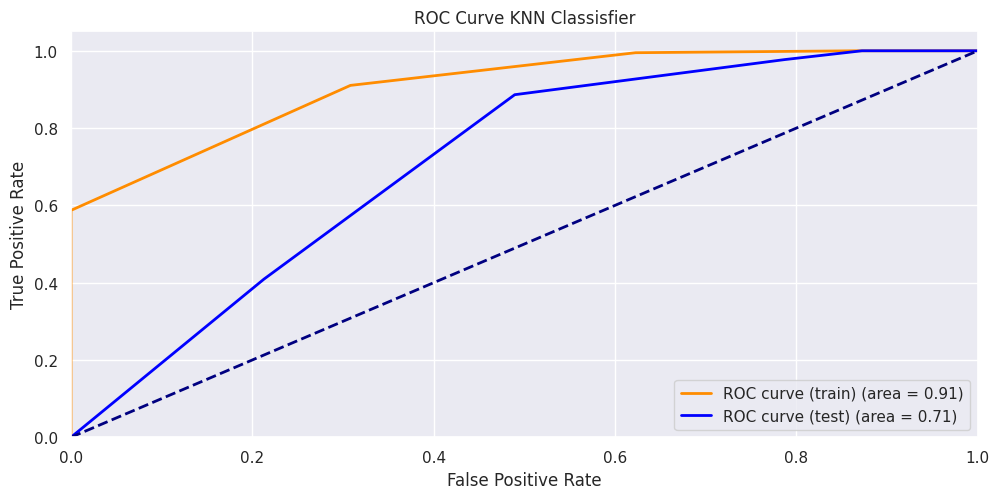

In [ ]:

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle


# Binarize the output
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

# Calculate predicted probabilities
# Using predict_proba to get probabilities for each class
y_pred_train_prob = knnclassifier.predict_proba(X_train)
y_pred_test_prob = knnclassifier.predict_proba(X_test)

# Generate ROC curve for training data
fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()
n_classes = y_train_bin.shape[1]
for i in range(n_classes):
  fpr_train[i], tpr_train[i], _ = roc_curve(y_train_bin[:, i], y_pred_train_prob[:, i])
  roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# Generate ROC curve for testing data
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()
for i in range(n_classes):
  fpr_test[i], tpr_test[i], _ = roc_curve(y_test_bin[:, i], y_pred_test_prob[:, i])
  roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])


# Plot ROC curves for training and testing data (example for a single class)
plt.figure()
lw = 2
plt.plot(fpr_train[0], tpr_train[0], color='darkorange',
         lw=lw, label='ROC curve (train) (area = %0.2f)' % roc_auc_train[0])
plt.plot(fpr_test[0], tpr_test[0], color='blue',
         lw=lw, label='ROC curve (test) (area = %0.2f)' % roc_auc_test[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve KNN Classisfier')
plt.legend(loc="lower right")
plt.show()

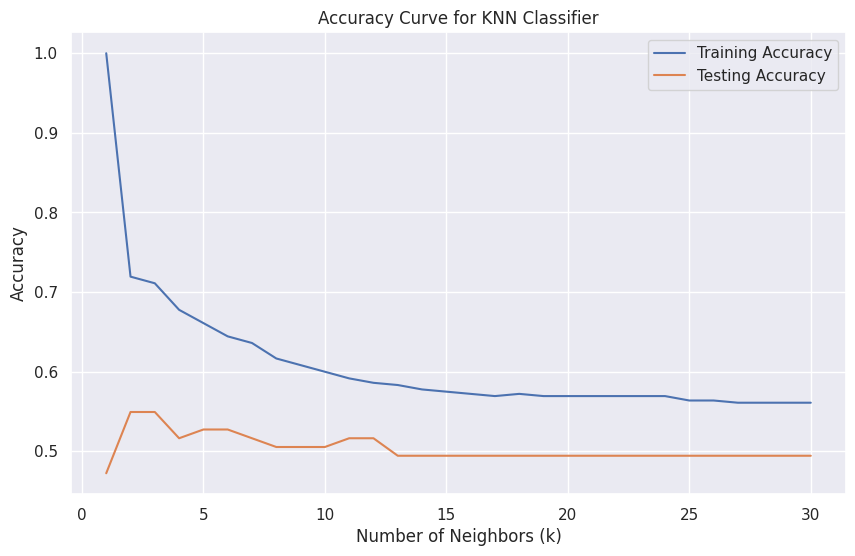

In [ ]:

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Create a list to store accuracy scores for different k values
k_values = list(range(1, 31))  # Test k values from 1 to 30
train_accuracy_scores = []
test_accuracy_scores = []

for k in k_values:
  # Create and train the KNN classifier with the current k value
  knn_classifier = KNeighborsClassifier(n_neighbors=k)
  knn_classifier.fit(X_train, y_train)

  # Calculate accuracy for training and testing data
  train_accuracy = accuracy_score(y_train, knn_classifier.predict(X_train))
  test_accuracy = accuracy_score(y_test, knn_classifier.predict(X_test))

  train_accuracy_scores.append(train_accuracy)
  test_accuracy_scores.append(test_accuracy)


# Plot the accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracy_scores, label='Training Accuracy')
plt.plot(k_values, test_accuracy_scores, label='Testing Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve for KNN Classifier')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:


# Assuming you have the plot generated in the plt object
plt.savefig('/content/drive/MyDrive/Project/Code/Results/knn_roc_curve.png')


<Figure size 1170x527 with 0 Axes>

In [ ]:
print('Train Recall score: {}'
      .format(knn_train_recall))
print('Test Recall score: {}'
      .format(knn_test_recall))


Train Recall score: 0.6777777777777778
Test Recall score: 0.5164835164835165


In [ ]:
result = pd.concat([result, pd.DataFrame([{'Model':'KNN Classifier','Train Accuracy':knn_train_accuracy,'Test Accuracy':knn_test_accuracy}])], ignore_index=True)

## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lgclassifier = LogisticRegression(solver = 'saga',random_state = 0)
lgclassifier.fit(X_train, y_train)
y_pred = lgclassifier.predict(X_test)

In [ ]:
lg_train_recall = recall_score(y_train, lgclassifier.predict(X_train),average='weighted')
lg_test_recall = recall_score(y_test, lgclassifier.predict(X_test),average='weighted')
lg_train_accuracy = accuracy_score(y_train, lgclassifier.predict(X_train))
lg_test_accuracy = accuracy_score(y_test, lgclassifier.predict(X_test))


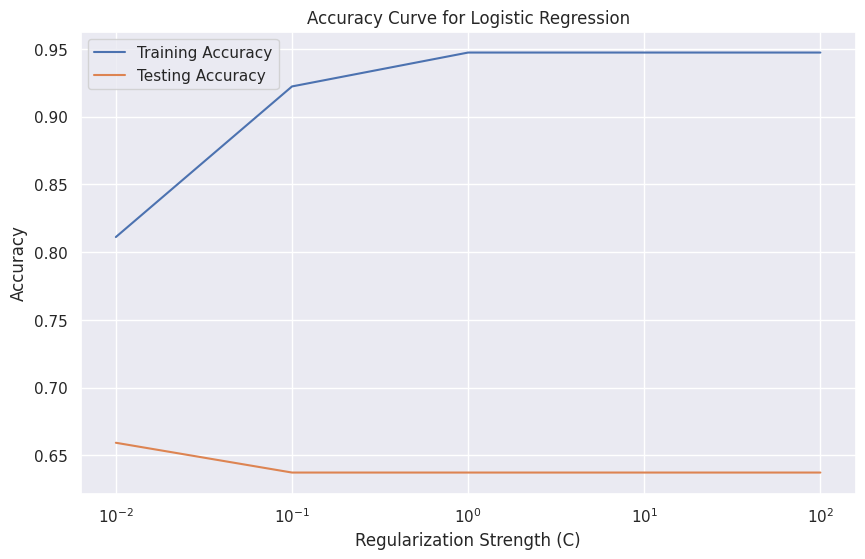

In [ ]:



# Create a list to store accuracy scores for different C values
c_values = [0.01, 0.1, 1, 10, 100]
train_accuracy_scores = []
test_accuracy_scores = []

for c in c_values:
  # Create and train the Logistic Regression classifier with the current C value
  lg_classifier = LogisticRegression(C=c, solver='saga', random_state=0)
  lg_classifier.fit(X_train, y_train)

  # Calculate accuracy for training and testing data
  train_accuracy = accuracy_score(y_train, lg_classifier.predict(X_train))
  test_accuracy = accuracy_score(y_test, lg_classifier.predict(X_test))

  train_accuracy_scores.append(train_accuracy)
  test_accuracy_scores.append(test_accuracy)


# Plot the accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(c_values, train_accuracy_scores, label='Training Accuracy')
plt.plot(c_values, test_accuracy_scores, label='Testing Accuracy')
plt.xscale('log')  # Use log scale for C values
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()





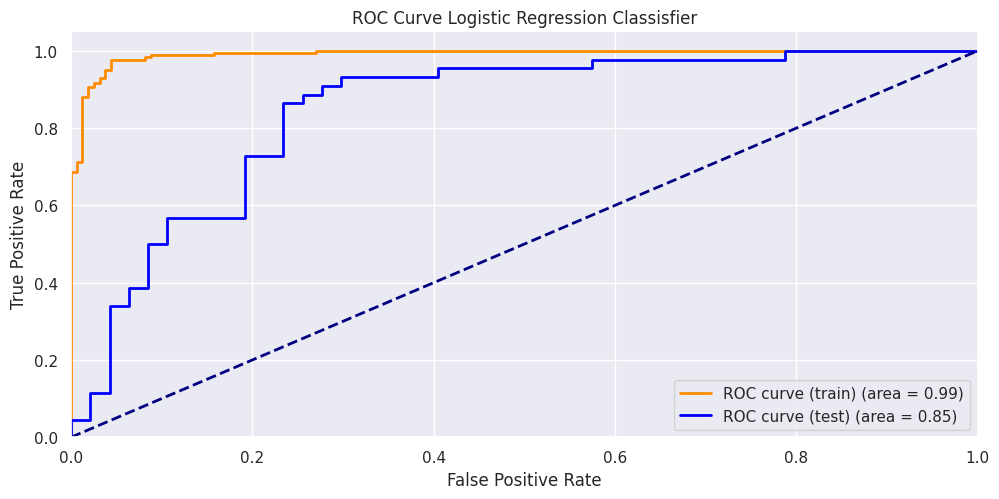

In [ ]:

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle


# Binarize the output
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

# Calculate predicted probabilities
# Using predict_proba to get probabilities for each class
y_pred_train_prob = lgclassifier.predict_proba(X_train)
y_pred_test_prob = lgclassifier.predict_proba(X_test)

# Generate ROC curve for training data
fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()
n_classes = y_train_bin.shape[1]
for i in range(n_classes):
  fpr_train[i], tpr_train[i], _ = roc_curve(y_train_bin[:, i], y_pred_train_prob[:, i])
  roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# Generate ROC curve for testing data
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()
for i in range(n_classes):
  fpr_test[i], tpr_test[i], _ = roc_curve(y_test_bin[:, i], y_pred_test_prob[:, i])
  roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])


# Plot ROC curves for training and testing data (example for a single class)
plt.figure()
lw = 2
plt.plot(fpr_train[0], tpr_train[0], color='darkorange',
         lw=lw, label='ROC curve (train) (area = %0.2f)' % roc_auc_train[0])
plt.plot(fpr_test[0], tpr_test[0], color='blue',
         lw=lw, label='ROC curve (test) (area = %0.2f)' % roc_auc_test[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Logistic Regression Classisfier')
plt.legend(loc="lower right")
plt.show()

In [ ]:
plt.savefig('/content/drive/MyDrive/Project/Code/Results/lg_roc_curve.png')

<Figure size 1170x527 with 0 Axes>

In [ ]:
print('Train Recall score: {}'
      .format(lg_train_recall))
print('Test Recall score: {}'
      .format(lg_test_recall))




Train Recall score: 0.9472222222222222
Test Recall score: 0.6373626373626373


In [ ]:
result = pd.concat([result, pd.DataFrame([{'Model':'Logestic Regression','Train Accuracy':lg_train_accuracy,'Test Accuracy':lg_test_accuracy}])], ignore_index=True)

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,max_depth=5)
dtclassifier.fit(X_train, y_train)
y_pred_test = dtclassifier.predict(X_test)
y_pred_train = dtclassifier.predict(X_train)

In [ ]:
dt_train_recall = recall_score(y_train,y_pred_train,average="weighted" )
dt_test_recall = recall_score(y_test, y_pred_test,average="weighted")
dt_train_accuracy = accuracy_score(y_train,y_pred_train )
dt_test_accuracy = accuracy_score(y_test, y_pred_test)


In [ ]:
# Plot the accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_accuracy_scores, label='Training Accuracy')
plt.plot(max_depth_values, test_accuracy_scores, label='Testing Accuracy')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve for Decision Tree Classifier')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'max_depth_values' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle


# Binarize the output
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

# Calculate predicted probabilities
# Using predict_proba to get probabilities for each class
y_pred_train_prob = dtclassifier.predict_proba(X_train)
y_pred_test_prob = dtclassifier.predict_proba(X_test)

# Generate ROC curve for training data
fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()
n_classes = y_train_bin.shape[1]
for i in range(n_classes):
  fpr_train[i], tpr_train[i], _ = roc_curve(y_train_bin[:, i], y_pred_train_prob[:, i])
  roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# Generate ROC curve for testing data
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()
for i in range(n_classes):
  fpr_test[i], tpr_test[i], _ = roc_curve(y_test_bin[:, i], y_pred_test_prob[:, i])
  roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])


# Plot ROC curves for training and testing data (example for a single class)
plt.figure()
lw = 2
plt.plot(fpr_train[0], tpr_train[0], color='darkorange',
         lw=lw, label='ROC curve (train) (area = %0.2f)' % roc_auc_train[0])
plt.plot(fpr_test[0], tpr_test[0], color='blue',
         lw=lw, label='ROC curve (test) (area = %0.2f)' % roc_auc_test[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Desicion Tree Classisfier')
plt.legend(loc="lower right")
plt.show()

In [ ]:
plt.savefig('/content/drive/MyDrive/Project/Code/Results/dt_roc_curve.png')

In [ ]:

print('\nDecision tree Classifier Evalutaion\n')
print('Train Recall score: {}'
      .format(dt_train_recall))
print('Test Recall score: {}'
      .format(dt_test_recall))




In [ ]:
result = pd.concat([result, pd.DataFrame([{'Model':'Decision Tree Classifier','Train Accuracy':dt_train_accuracy,'Test Accuracy':dt_test_accuracy}])], ignore_index=True)

## Linear SVM

In [ ]:
from sklearn.svm import LinearSVC
lsvclassifier = LinearSVC(C=0.01)
lsvclassifier.fit(X_train, y_train)
y_pred_test = lsvclassifier.predict(X_test)
y_pred_train = lsvclassifier.predict(X_train)

In [ ]:
lsvc_train_accuracy = accuracy_score(y_train, y_pred_train)
lsvc_test_accuracy = accuracy_score(y_test, y_pred_test)
lsvc_train_recall = recall_score(y_train,y_pred_train,average="weighted" )
lsvc_test_recall = recall_score(y_test, y_pred_test,average="weighted")

In [ ]:
print('Train Recall score: {}'
      .format(lsvc_train_recall))
print('Test Recall score: {}'
      .format(lsvc_test_recall))


In [ ]:
result = pd.concat([result, pd.DataFrame([{'Model':'Linear SVC','Train Accuracy':lsvc_train_accuracy,'Test Accuracy':lsvc_test_accuracy}])], ignore_index=True )

In [ ]:

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle


# Binarize the output
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

# Calculate predicted probabilities
# Using predict_proba to get probabilities for each class
y_pred_train_prob = lsvclassifier.decision_function(X_train)
y_pred_test_prob = lsvclassifier.decision_function(X_test)

# Generate ROC curve for training data
fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()
n_classes = y_train_bin.shape[1]
for i in range(n_classes):
  fpr_train[i], tpr_train[i], _ = roc_curve(y_train_bin[:, i], y_pred_train_prob[:, i])
  roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# Generate ROC curve for testing data
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()
for i in range(n_classes):
  fpr_test[i], tpr_test[i], _ = roc_curve(y_test_bin[:, i], y_pred_test_prob[:, i])
  roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])


# Plot ROC curves for training and testing data (example for a single class)
plt.figure()
lw = 2
plt.plot(fpr_train[0], tpr_train[0], color='darkorange',
         lw=lw, label='ROC curve (train) (area = %0.2f)' % roc_auc_train[0])
plt.plot(fpr_test[0], tpr_test[0], color='blue',
         lw=lw, label='ROC curve (test) (area = %0.2f)' % roc_auc_test[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Linear SVM Classisfier')
plt.legend(loc="lower right")
plt.show()

In [ ]:
plt.savefig('/content/drive/MyDrive/Project/Code/Results/lsvm_roc_curve.png')

## Kernelized SVM

In [ ]:
from sklearn import svm
KSVC_clf = svm.SVC(kernel='sigmoid',C=10,gamma=0.001,probability=True)
KSVC_clf.fit(X_train, y_train)
y_pred_train = KSVC_clf.predict(X_train)
y_pred_test = KSVC_clf.predict(X_test)

In [ ]:
ksvc_train_recall = recall_score(y_train,y_pred_train,average="weighted" )
ksvc_test_recall = recall_score(y_test, y_pred_test,average="weighted")

ksvc_train_accuracy = accuracy_score(y_train, y_pred_train)
ksvc_test_accuracy = accuracy_score(y_test, y_pred_test)

In [ ]:


plt.figure(figsize=(10, 6))
plt.plot(['Train', 'Test'], [ksvc_train_accuracy, ksvc_test_accuracy], marker='o')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve for Kernelized SVM')
plt.grid(True)
plt.show()


In [ ]:
print('Train Recall score: {}'
      .format(ksvc_train_recall))
print('Test Recall score: {}'
      .format(ksvc_test_recall))


In [ ]:



# Binarize the output
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

# Calculate predicted probabilities
# Using predict_proba to get probabilities for each class
y_pred_train_prob = KSVC_clf.predict_proba(X_train)
y_pred_test_prob = KSVC_clf.predict_proba(X_test)

# Generate ROC curve for training data
fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()
n_classes = y_train_bin.shape[1]
for i in range(n_classes):
  fpr_train[i], tpr_train[i], _ = roc_curve(y_train_bin[:, i], y_pred_train_prob[:, i])
  roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# Generate ROC curve for testing data
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()
for i in range(n_classes):
  fpr_test[i], tpr_test[i], _ = roc_curve(y_test_bin[:, i], y_pred_test_prob[:, i])
  roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])


# Plot ROC curves for training and testing data (example for a single class)
plt.figure()
lw = 2
plt.plot(fpr_train[0], tpr_train[0], color='darkorange',
         lw=lw, label='ROC curve (train) (area = %0.2f)' % roc_auc_train[0])
plt.plot(fpr_test[0], tpr_test[0], color='blue',
         lw=lw, label='ROC curve (test) (area = %0.2f)' % roc_auc_test[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Kernalised SVM Classisfier')
plt.legend(loc="lower right")
plt.show()

In [ ]:
plt.savefig('/content/drive/MyDrive/Project/Code/Results/ksvm_roc_curve.png')

In [ ]:
result = pd.concat([result, pd.DataFrame([{'Model':'Kernalised SVM','Train Accuracy':lsvc_train_accuracy,'Test Accuracy':lsvc_test_accuracy}])], ignore_index=True )

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=300, criterion='gini',max_features=100,max_depth=10,max_leaf_nodes=30)
rf_clf.fit(X_train, y_train)

In [ ]:
y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

rf_train_accuracy = accuracy_score(y_train, y_pred_train)
rf_test_accuracy = accuracy_score(y_test, y_pred_test)
rf_train_recall = recall_score(y_train,y_pred_train,average="weighted" )
rf_test_recall = recall_score(y_test, y_pred_test,average="weighted")

In [ ]:


# Binarize the output
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

# Calculate predicted probabilities
y_pred_train_prob = rf_clf.predict_proba(X_train)
y_pred_test_prob = rf_clf.predict_proba(X_test)

# Generate ROC curve for training data
fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()
n_classes = y_train_bin.shape[1]
for i in range(n_classes):
  fpr_train[i], tpr_train[i], _ = roc_curve(y_train_bin[:, i], y_pred_train_prob[:, i])
  roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# Generate ROC curve for testing data
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()
for i in range(n_classes):
  fpr_test[i], tpr_test[i], _ = roc_curve(y_test_bin[:, i], y_pred_test_prob[:, i])
  roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])


# Plot ROC curves for training and testing data (example for a single class)
plt.figure()
lw = 2
plt.plot(fpr_train[0], tpr_train[0], color='darkorange',
         lw=lw, label='ROC curve (train) (area = %0.2f)' % roc_auc_train[0])
plt.plot(fpr_test[0], tpr_test[0], color='blue',
         lw=lw, label='ROC curve (test) (area = %0.2f)' % roc_auc_test[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

print('Train Recall score: {}'
      .format(rf_train_recall))
print('Test Recall score: {}'
      .format(rf_test_recall))






In [ ]:
plt.savefig('/content/drive/MyDrive/Project/Code/Results/rf_roc_curve.png')

We found that the best model in term of recall Score is kernelized SVM with accuracy percentage of **79.12** over other models. We also found that Logestic Regression has better accuracy score.

---
---

# with **PCA**

Principle Component Analysis with models

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(.98)
pca.fit(X_train)
pca.n_components_

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
# prompt: display shape of train anad test after pca

print("Original shape of X_train:", X_train.shape)
print("Reduced shape of X_train:", X_train_pca.shape)
print("Original shape of X_test:", X_test.shape)
print("Reduced shape of X_test:", X_test_pca.shape)


In [ ]:
from sklearn.model_selection import StratifiedKFold
kFold = StratifiedKFold(n_splits=5)
from sklearn.model_selection import GridSearchCV

# KNN with PCA

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnp_clf = KNeighborsClassifier(n_neighbors=5)
knnp_clf.fit(X_train_pca, y_train)
y_pred_train = knnp_clf.predict(X_train_pca)
y_pred_test = knnp_clf.predict(X_test_pca)

In [ ]:
knnp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
knnp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
knnp_train_accuracy = accuracy_score(y_train, y_pred_train)
knnp_test_accuracy = accuracy_score(y_test, y_pred_test)


In [ ]:

print('Train Recall score: {}'
      .format(knnp_train_recall))
print('Test Recall score: {}'
      .format(knnp_test_recall))


In [ ]:


# Binarize the output
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

# Calculate predicted probabilities
y_pred_train_prob = knnp_clf.predict_proba(X_train_pca)
y_pred_test_prob = knnp_clf.predict_proba(X_test_pca)

# Generate ROC curve for training data
fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()
n_classes = y_train_bin.shape[1]
for i in range(n_classes):
  fpr_train[i], tpr_train[i], _ = roc_curve(y_train_bin[:, i], y_pred_train_prob[:, i])
  roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# Generate ROC curve for testing data
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()
for i in range(n_classes):
  fpr_test[i], tpr_test[i], _ = roc_curve(y_test_bin[:, i], y_pred_test_prob[:, i])
  roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])


# Plot ROC curves for training and testing data (example for a single class)
plt.figure()
lw = 2
plt.plot(fpr_train[0], tpr_train[0], color='darkorange',
         lw=lw, label='ROC curve (train) (area = %0.2f)' % roc_auc_train[0])
plt.plot(fpr_test[0], tpr_test[0], color='blue',
         lw=lw, label='ROC curve (test) (area = %0.2f)' % roc_auc_test[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve KNN Classifier with PCA')
plt.legend(loc="lower right")
plt.show()






In [ ]:
plt.savefig('/content/drive/MyDrive/Project/Code/Results/knnpca_roc_curve.png')

In [ ]:
result = pd.concat([result, pd.DataFrame([{'Model':'KNN Classifier with PCA','Train Accuracy':knnp_train_accuracy,'Test Accuracy':knnp_test_accuracy}])], ignore_index=True)

we didn't find any improvement on PCA data with knn classifier model.

# Logestic with PCA

In [ ]:
from sklearn.linear_model import LogisticRegression
lgp_clf = LogisticRegression(solver='saga',C=0.01)
lgp_clf.fit(X_train_pca, y_train)
y_pred_train = lgp_clf.predict(X_train_pca)
y_pred_test = lgp_clf.predict(X_test_pca)


In [ ]:
lgp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
lgp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
lgp_train_accuracy = accuracy_score(y_train, y_pred_train)
lgp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [ ]:
print('Train Recall score: {}'.format(lgp_train_recall))
print('Test Recall score: {}'.format(lgp_test_recall))


In [ ]:


# Binarize the output
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

# Calculate predicted probabilities
y_pred_train_prob = lgp_clf.predict_proba(X_train_pca)
y_pred_test_prob = lgp_clf.predict_proba(X_test_pca)

# Generate ROC curve for training data
fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()
n_classes = y_train_bin.shape[1]
for i in range(n_classes):
  fpr_train[i], tpr_train[i], _ = roc_curve(y_train_bin[:, i], y_pred_train_prob[:, i])
  roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# Generate ROC curve for testing data
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()
for i in range(n_classes):
  fpr_test[i], tpr_test[i], _ = roc_curve(y_test_bin[:, i], y_pred_test_prob[:, i])
  roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])


# Plot ROC curves for training and testing data (example for a single class)
plt.figure()
lw = 2
plt.plot(fpr_train[0], tpr_train[0], color='darkorange',
         lw=lw, label='ROC curve (train) (area = %0.2f)' % roc_auc_train[0])
plt.plot(fpr_test[0], tpr_test[0], color='blue',
         lw=lw, label='ROC curve (test) (area = %0.2f)' % roc_auc_test[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Logestic Regression with PCA')
plt.legend(loc="lower right")
plt.show()





In [ ]:
plt.savefig('/content/drive/MyDrive/Project/Code/Results/lgpca_roc_curve.png')

In [ ]:
result = pd.concat([result, pd.DataFrame([{'Model':'Logestic Regression with PCA','Train Accuracy':lgp_train_accuracy,'Test Accuracy':lgp_test_accuracy}])], ignore_index=True)

# Linear svm with PCA

In [ ]:
from sklearn.svm import LinearSVC
LSVC_clf = LinearSVC(C=0.001)
LSVC_clf.fit(X_train_pca, y_train)
y_pred_train = LSVC_clf.predict(X_train_pca)
y_pred_test = LSVC_clf.predict(X_test_pca)

In [ ]:
lsvcp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
lsvcp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
lsvcp_train_accuracy = accuracy_score(y_train, y_pred_train)
lsvcp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [ ]:
print('Train Recall score: {}'
      .format(lsvcp_train_recall))
print('Test Recall score: {}'
      .format(lsvcp_test_recall))



In [ ]:


# Binarize the output
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

# Calculate predicted probabilities
y_pred_train_prob = LSVC_clf.decision_function(X_train_pca)
y_pred_test_prob = LSVC_clf.decision_function(X_test_pca)

# Generate ROC curve for training data
fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()
n_classes = y_train_bin.shape[1]
for i in range(n_classes):
  fpr_train[i], tpr_train[i], _ = roc_curve(y_train_bin[:, i], y_pred_train_prob[:, i])
  roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# Generate ROC curve for testing data
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()
for i in range(n_classes):
  fpr_test[i], tpr_test[i], _ = roc_curve(y_test_bin[:, i], y_pred_test_prob[:, i])
  roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])


# Plot ROC curves for training and testing data (example for a single class)
plt.figure()
lw = 2
plt.plot(fpr_train[0], tpr_train[0], color='darkorange',
         lw=lw, label='ROC curve (train) (area = %0.2f)' % roc_auc_train[0])
plt.plot(fpr_test[0], tpr_test[0], color='blue',
         lw=lw, label='ROC curve (test) (area = %0.2f)' % roc_auc_test[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Linear SVC with PCA')
plt.legend(loc="lower right")
plt.show()





In [ ]:
plt.savefig('/content/drive/MyDrive/Project/Code/Results/lsvmpca_roc_curve.png')

In [ ]:
result = pd.concat([result, pd.DataFrame([{'Model':'Linear SVC with PCA','Train Accuracy':lsvcp_train_accuracy,'Test Accuracy':lsvcp_test_accuracy}])], ignore_index=True )

# Kernal svm with PCA

In [ ]:
from sklearn import svm
KSVC_clf = svm.SVC(kernel='sigmoid',C=10,gamma=0.001)

KSVC_clf.fit(X_train_pca, y_train)
y_pred_train = KSVC_clf.predict(X_train_pca)
y_pred_test = KSVC_clf.predict(X_test_pca)


In [ ]:
ksvcp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
ksvcp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
ksvcp_train_accuracy = accuracy_score(y_train, y_pred_train,)
ksvcp_test_accuracy = accuracy_score(y_test, y_pred_test)


In [ ]:

from sklearn.model_selection import validation_curve
from sklearn import svm

# Create a range of C values to test
param_range = np.logspace(-3, 2, 6)  # 6 values between 0.001 and 100

# Calculate accuracy scores for different C values using validation_curve
train_scores, test_scores = validation_curve(
    svm.SVC(kernel='sigmoid', gamma=0.001),  # Your KSVC model
    X_train_pca,
    y_train,
    param_name="C",
    param_range=param_range,
    cv=5,  # 5-fold cross-validation
    scoring="accuracy"
)

# Calculate mean and standard deviation of accuracy scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the accuracy curve
plt.figure(figsize=(10, 6))
plt.title("Accuracy Curve for Kernel SVC with PCA")
plt.xlabel("C (Regularization Parameter)")
plt.ylabel("Accuracy Score")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Training Accuracy", color="darkorange")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="darkorange")
plt.semilogx(param_range, test_scores_mean, label="Testing Accuracy", color="navy")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="navy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.preprocessing import label_binarize  # Import label_binarize


# Binarize the output
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

# Calculate predicted probabilities
y_pred_train_prob = KSVC_clf.decision_function(X_train_pca)
y_pred_test_prob = KSVC_clf.decision_function(X_test_pca)

# Generate ROC curve for training data
fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()
n_classes = y_train_bin.shape[1]
for i in range(n_classes):
  fpr_train[i], tpr_train[i], _ = roc_curve(y_train_bin[:, i], y_pred_train_prob[:, i])
  roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# Generate ROC curve for testing data
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()
for i in range(n_classes):
  fpr_test[i], tpr_test[i], _ = roc_curve(y_test_bin[:, i], y_pred_test_prob[:, i])
  roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])


# Plot ROC curves for training and testing data (example for a single class)
plt.figure()
lw = 2
plt.plot(fpr_train[0], tpr_train[0], color='darkorange',
         lw=lw, label='ROC curve (train) (area = %0.2f)' % roc_auc_train[0])
plt.plot(fpr_test[0], tpr_test[0], color='blue',
         lw=lw, label='ROC curve (test) (area = %0.2f)' % roc_auc_test[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve kernelized SVC with PCA')
plt.legend(loc="lower right")
plt.show()





In [ ]:
plt.savefig('/content/drive/MyDrive/Project/Code/Results/ksvcpca_roc_curve.png')

In [ ]:
print('Train Recall score: {}'
      .format(ksvcp_train_recall))
print('Test Recall score: {}'
      .format(ksvcp_test_recall))



In [ ]:
result = pd.concat([result, pd.DataFrame([{'Model':'kernelized SVC with PCA','Train Accuracy':ksvcp_train_accuracy,'Test Accuracy':ksvcp_test_accuracy}])], ignore_index=True )

# DecisionTree Classifier with PCA

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 2,max_depth=5)
dt_clf.fit(X_train_pca, y_train)
y_pred_train = dt_clf.predict(X_train_pca)
y_pred_test = dt_clf.predict(X_test_pca)

In [ ]:
dtp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
dtp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
dtp_train_accuracy = accuracy_score(y_train, y_pred_train)
dtp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [ ]:
print('Train Recall score: {}'
      .format(dtp_train_recall))
print('Test Recall score: {}'
      .format(dtp_test_recall))



In [ ]:


# Binarize the output
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

# Calculate predicted probabilities
y_pred_train_prob = dt_clf.predict_proba(X_train_pca)
y_pred_test_prob = dt_clf.predict_proba(X_test_pca)

# Generate ROC curve for training data
fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()
n_classes = y_train_bin.shape[1]
for i in range(n_classes):
  fpr_train[i], tpr_train[i], _ = roc_curve(y_train_bin[:, i], y_pred_train_prob[:, i])
  roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# Generate ROC curve for testing data
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()
for i in range(n_classes):
  fpr_test[i], tpr_test[i], _ = roc_curve(y_test_bin[:, i], y_pred_test_prob[:, i])
  roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])


# Plot ROC curves for training and testing data (example for a single class)
plt.figure()
lw = 2
plt.plot(fpr_train[0], tpr_train[0], color='darkorange',
         lw=lw, label='ROC curve (train) (area = %0.2f)' % roc_auc_train[0])
plt.plot(fpr_test[0], tpr_test[0], color='blue',
         lw=lw, label='ROC curve (test) (area = %0.2f)' % roc_auc_test[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve DecisionTree Classifier with PCA')
plt.legend(loc="lower right")
plt.show()





In [ ]:
result = pd.concat([result, pd.DataFrame([{'Model':'DecisionTree Classifier with PCA','Train Accuracy':dtp_train_accuracy,'Test Accuracy':dtp_test_accuracy}])], ignore_index=True)

# Random Forest Classifier With PCA

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfp_clf = RandomForestClassifier()
rfp_clf.fit(X_train_pca, y_train)
y_pred_train = rfp_clf.predict(X_train_pca)
y_pred_test = rfp_clf.predict(X_test_pca)

In [ ]:
rfp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
rfp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
rfp_train_accuracy = accuracy_score(y_train, y_pred_train)
rfp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [ ]:
print('Train Recall score: {}'
      .format(rfp_train_recall))
print('Test Recall score: {}'
      .format(rfp_test_recall))


In [ ]:


# Binarize the output
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

# Calculate predicted probabilities
y_pred_train_prob = rfp_clf.predict_proba(X_train_pca)
y_pred_test_prob = rfp_clf.predict_proba(X_test_pca)

# Generate ROC curve for training data
fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()
n_classes = y_train_bin.shape[1]
for i in range(n_classes):
  fpr_train[i], tpr_train[i], _ = roc_curve(y_train_bin[:, i], y_pred_train_prob[:, i])
  roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# Generate ROC curve for testing data
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()
for i in range(n_classes):
  fpr_test[i], tpr_test[i], _ = roc_curve(y_test_bin[:, i], y_pred_test_prob[:, i])
  roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])


# Plot ROC curves for training and testing data (example for a single class)
plt.figure()
lw = 2
plt.plot(fpr_train[0], tpr_train[0], color='darkorange',
         lw=lw, label='ROC curve (train) (area = %0.2f)' % roc_auc_train[0])
plt.plot(fpr_test[0], tpr_test[0], color='blue',
         lw=lw, label='ROC curve (test) (area = %0.2f)' % roc_auc_test[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Random Forest Classifier with PCA')
plt.legend(loc="lower right")
plt.show()





In [ ]:
plt.savefig('/content/drive/MyDrive/Project/Code/Results/rdcpca_roc_curve.png')

In [ ]:
result = pd.concat([result, pd.DataFrame([{'Model':'Random Forest Classifier with PCA','Train Accuracy':rfp_train_accuracy,'Test Accuracy':rfp_test_accuracy}])], ignore_index=True )

Random Forest Classifier is overfitting the model and is not yielding good result.

In [ ]:
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.677778,0.516484
1,Logestic Regression,0.947222,0.637363


---
---

# Result

In [ ]:
ax=result.plot(kind="bar",figsize=(20,5))
ax.set_xticks(result.index)
ax.set_xticklabels(result.Model,rotation=90)
plt.title('Train & Test Scores of Classifiers')
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')
plt.legend(loc=4 , bbox_to_anchor=(1.2, 0))
plt.show();

In [ ]:
# prompt: # prompt: do hyper parameter tuning for Kernelized SVM with pca also print shape of dataset

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Kernelized SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}
# Create a Kernelized SVM classifier
KSVC_clf = svm.SVC(probability=True)

# Create the GridSearchCV object
grid_search = GridSearchCV(KSVC_clf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train_pca, y_train)

# Print the best hyperparameters and the best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

print("Shape of X_train_pca:", X_train_pca.shape)
print("Shape of X_test_pca:", X_test_pca.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


In [ ]:
# prompt: comapre the test AND train accuracy of Kernelized SVM before hyper parameter tuning and after tuning in a table format

# Assuming 'KSVC_clf' is your Kernelized SVM model before tuning
# and 'best_KSVC_clf' is the tuned model.  Also assuming that
# ksvc_train_accuracy and ksvc_test_accuracy are defined from previous code blocks

# Create a list to store the results for the table
data = []

# Add results for before hyperparameter tuning
data.append({
    'Model': 'Kernelized SVM (Before Tuning)',
    'Train Accuracy': ksvc_train_accuracy,
    'Test Accuracy': ksvc_test_accuracy
})

# Assign the best estimator from GridSearchCV to best_KSVC_clf
best_KSVC_clf = grid_search.best_estimator_  # Assuming grid_search is defined from previous code block

# Add results for after hyperparameter tuning
# Use PCA-transformed data for evaluation
data.append({
    'Model': 'Kernelized SVM (After Tuning)',
    'Train Accuracy': best_KSVC_clf.score(X_train_pca, y_train), # Changed to X_train_pca
    'Test Accuracy': best_KSVC_clf.score(X_test_pca, y_test)    # Changed to X_test_pca
})

# Create a Pandas DataFrame from the results
results_df = pd.DataFrame(data)

# Display the table
results_df

In [ ]:

%pip install scikit-plot==0.3.7 --force-reinstall 2>/dev/null
!pip uninstall -y numpy scipy seaborn
!pip install --no-cache-dir numpy scipy seaborn --force-reinstall


In [ ]:
# prompt: do explainability of models

import lime
import lime.lime_tabular

# Assuming 'best_KSVC_clf' is your tuned Kernelized SVM model
# and X_train_pca, X_test_pca, y_train, y_test are defined

# Create a LimeTabularExplainer object
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train_pca,
    feature_names=[f"PCA{i}" for i in range(X_train_pca.shape[1])],  # Use PCA feature names
    class_names=list(map(str, np.unique(y_train))),  # Provide class names
    discretize_continuous=True
)

# Choose an instance to explain
instance_index = 0  # Example index in X_test_pca
instance = X_test_pca[instance_index]

from sklearn.svm import SVC  # Import SVC

# Ensure SVC is initialized with probability=True
best_KSVC_clf = SVC(probability=True)

# Train the model (Ensure X_train and y_train are defined)
best_KSVC_clf.fit(X_train_pca, y_train)

# Now use it with the explainer
exp = explainer.explain_instance(
    instance,
    best_KSVC_clf.predict_proba,
    num_features=10  # Number of features to display
)



# Display the explanation (several ways)

# 1. Show the explanation as a text
print(exp.as_list())

# 2. Show the explanation as a pyplot figure (needs matplotlib)
exp.show_in_notebook(show_table=True)


# 3. Save the explanation to an HTML file
import os

file_path = "/content/drive/MyDrive/Project/Code/lime_explanation.html"

if os.path.exists(file_path):
    os.remove(file_path)

exp.save_to_file(file_path)

## Conclusion

The models started performing better after we applied PCA on the resampled data. The reason behind this is, PCA reduces the complexity of the data. It creates components based on giving importance to variables with large variance and also the components which it creates are non collinear in nature which means it takes care of collinearity in large data set. PCA also improves the overall execution time and quality of the models and it is very beneficial when we are working with huge amount of variables.

The Best model in term of recall score is **Kernalized SVM with PCA** having accuracy of **80.21%.**

In [ ]:
# prompt:
# exp.save_to_file("/content/drive/MyDrive/Project/Code/lime_explanation.html") replace the exsiting file


